In [6]:
import pandas as pd 
import numpy as np

preds_30 = pd.read_csv('submission_LightGBM_30_1.csv')
preds_30.head()

,id,pred
0,20000,0.519561
1,20001,0.595356
2,20002,0.153161
3,20003,0.491222
4,20004,0.031696


In [7]:
preds_30['pred'] = preds_30['pred'] 
preds_30['pred'].head()

0    0.419561
1    0.495356
2    0.053161
3    0.391222
4   -0.068304
Name: pred, dtype: float64

In [3]:
preds_30.to_csv('submission_LightGBM_30_1_perb.csv', index = False)

# Removing Correlated Files

In [3]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

## Reading data-files
df = pd.read_parquet('s3://analytics-data-science-competitions/Tabular-Playground-Series/Tabular-Playground-Nov-2022/preds_concat_gzip.parquet', engine = 'fastparquet')

## train and test
preds_df = df.clip(0, 1) 
train = preds_df[preds_df['target'].notnull()]
test = preds_df[preds_df['target'].isnull()] 

In [2]:
train_new = train.drop(columns = 'target', axis = 1).reset_index(drop = True)
train_new

,0.7301891713.csv,0.6750726968.csv,0.7194704070.csv,0.7107007521.csv,0.6952032365.csv,0.7311830751.csv,0.6736005999.csv,0.7205109360.csv,0.7298116981.csv,0.6737624943.csv,0.7105097012.csv,0.7163693161.csv,0.7225567087.csv,0.6872126167.csv,0.7292947020.csv,0.6798503735.csv,0.7130672940.csv,0.6709092823.csv,0.7391105353.csv,0.6616334858.csv,0.6897190987.csv,0.6963558296.csv,0.7170726761.csv,0.7156669797.csv,0.6814483512.csv,0.7167410246.csv,0.6981892492.csv,0.7119194656.csv,0.6932545022.csv,0.6593521643.csv,0.6743157708.csv,0.7125579799.csv,0.7069356577.csv,0.6884713711.csv,0.6702128703.csv,0.6564147356.csv,0.6977737011.csv,0.6638768547.csv,0.7032756348.csv,0.6862982027.csv,0.6864219834.csv,0.7088904051.csv,0.7212180410.csv,0.7421980731.csv,0.6825341422.csv,0.6848737762.csv,0.7144978161.csv,0.6658856476.csv,0.7195078907.csv,0.7096861940.csv,...,0.6885464000.csv,0.6870791547.csv,0.6967096004.csv,0.7060967827.csv,0.7113625862.csv,0.6694947166.csv,0.6900693308.csv,0.7128591265.csv,0.6818718747.csv,0.6858034178.csv,0.7122377012.csv,0.7144335192.csv,0.7083170570.csv,0.7142499638.csv,0.7136242881.csv,0.6888742488.csv,0.7087145574.csv,0.6566530931.csv,0.7197358544.csv,0.7101817035.csv,0.7520219713.csv,0.7215952204.csv,0.6795805487.csv,0.7083706040.csv,0.6941218921.csv,0.6926641668.csv,0.6869857003.csv,0.7198785912.csv,0.7287761089.csv,0.7035686386.csv,0.7336496744.csv,0.6872533788.csv,0.7005346672.csv,0.7369069391.csv,0.7156537235.csv,0.7121002711.csv,0.7289228406.csv,0.7174789519.csv,0.7032181627.csv,0.6668147232.csv,0.7345858839.csv,0.7056743178.csv,0.6850481924.csv,0.7359858591.csv,0.7068431477.csv,0.7121179915.csv,0.6613117872.csv,0.6843637618.csv,0.6781392004.csv,0.7222809303.csv
0,0.713797,0.894976,0.817926,0.810555,0.791920,0.831945,0.774879,0.741634,0.756136,0.727903,0.763435,0.769848,0.802273,0.760738,0.839669,0.60,0.767607,0.823816,0.872288,0.655031,0.736038,0.798806,0.778560,0.782497,0.812633,0.809022,0.800860,0.805305,0.741648,0.971786,0.72789,0.814,0.774592,0.787105,0.915710,0.880978,0.778571,0.844169,0.784163,0.782036,0.780643,0.721790,0.698241,0.808,0.798784,0.477387,0.772133,0.905410,0.773577,0.726302,...,0.797995,0.763574,0.752004,0.776569,0.798669,0.807704,0.767779,0.831448,0.792231,0.763278,0.779712,0.716066,0.703275,0.768230,0.804498,0.786796,0.718659,0.662422,0.813924,0.743625,0.663370,0.790927,0.775915,0.778482,0.774662,0.777772,0.778873,0.775081,0.824640,0.817052,0.830458,0.78967,0.786102,0.758304,0.783439,0.796190,0.756559,0.797150,0.761263,0.924655,0.716121,0.810299,0.768360,0.796567,0.838916,0.765676,0.659398,0.799853,0.831508,0.824168
1,0.663330,0.640218,0.574168,0.574927,0.667912,0.756107,0.638533,0.605146,0.624973,0.605908,0.555053,0.565853,0.825874,0.746966,0.803360,0.76,0.715148,0.712462,0.752800,0.544701,0.755066,0.654167,0.594217,0.592934,0.757777,0.624227,0.635633,0.557927,0.501230,0.692161,0.76032,0.614,0.638995,0.622001,0.551986,0.666823,0.680000,0.689739,0.635571,0.651588,0.645543,0.610949,0.603778,0.829,0.820298,0.503128,0.582307,0.649761,0.696104,0.570501,...,0.704454,0.580294,0.618501,0.570683,0.600717,0.662596,0.587837,0.597760,0.777449,0.672334,0.536803,0.635282,0.564045,0.591958,0.692422,0.630778,0.600586,0.511741,0.599708,0.593361,0.721298,0.571635,0.644542,0.601430,0.681132,0.593403,0.631658,0.656799,0.566144,0.618821,0.635893,0.62927,0.744298,0.561998,0.580583,0.611598,0.589977,0.550247,0.547826,0.713663,0.644158,0.640244,0.646700,0.700815,0.633100,0.657584,0.536717,0.649205,0.601636,0.532060
2,0.772586,0.816572,0.880483,0.829270,0.765237,0.821705,0.839576,0.824883,0.841343,0.781148,0.843974,0.829139,0.407582,0.762720,0.816622,0.76,0.876730,0.754158,0.851190,0.714048,0.813104,0.802805,0.860778,0.844159,0.773301,0.798508,0.793820,0.834659,0.642200,0.816399,0.80876,0.750,0.823076,0.795760,0.817964,0.802251,0.764286,0.809974,0.829432,0.805009,0.798551,0.830638,0.841210,0.831,0.769674,0.637722,0.867044,0.818138,0.827123,0.804784,...,0.788965,0.781609,0.818155,0.839284,0.836058,0.807791,0.811447

In [3]:
train_new = train_new.T.drop_duplicates().T
train_new.head()

,0.7301891713.csv,0.6750726968.csv,0.7194704070.csv,0.7107007521.csv,0.6952032365.csv,0.7311830751.csv,0.6736005999.csv,0.7205109360.csv,0.7298116981.csv,0.6737624943.csv,0.7105097012.csv,0.7163693161.csv,0.7225567087.csv,0.6872126167.csv,0.7292947020.csv,0.6798503735.csv,0.7130672940.csv,0.6709092823.csv,0.7391105353.csv,0.6616334858.csv,0.6897190987.csv,0.6963558296.csv,0.7170726761.csv,0.7156669797.csv,0.6814483512.csv,0.7167410246.csv,0.6981892492.csv,0.7119194656.csv,0.6932545022.csv,0.6593521643.csv,0.6743157708.csv,0.7125579799.csv,0.7069356577.csv,0.6884713711.csv,0.6702128703.csv,0.6564147356.csv,0.6977737011.csv,0.6638768547.csv,0.7032756348.csv,0.6862982027.csv,0.6864219834.csv,0.7088904051.csv,0.7212180410.csv,0.7421980731.csv,0.6825341422.csv,0.6848737762.csv,0.7144978161.csv,0.6658856476.csv,0.7195078907.csv,0.7096861940.csv,...,0.6885464000.csv,0.6870791547.csv,0.6967096004.csv,0.7060967827.csv,0.7113625862.csv,0.6694947166.csv,0.6900693308.csv,0.7128591265.csv,0.6818718747.csv,0.6858034178.csv,0.7122377012.csv,0.7144335192.csv,0.7083170570.csv,0.7142499638.csv,0.7136242881.csv,0.6888742488.csv,0.7087145574.csv,0.6566530931.csv,0.7197358544.csv,0.7101817035.csv,0.7520219713.csv,0.7215952204.csv,0.6795805487.csv,0.7083706040.csv,0.6941218921.csv,0.6926641668.csv,0.6869857003.csv,0.7198785912.csv,0.7287761089.csv,0.7035686386.csv,0.7336496744.csv,0.6872533788.csv,0.7005346672.csv,0.7369069391.csv,0.7156537235.csv,0.7121002711.csv,0.7289228406.csv,0.7174789519.csv,0.7032181627.csv,0.6668147232.csv,0.7345858839.csv,0.7056743178.csv,0.6850481924.csv,0.7359858591.csv,0.7068431477.csv,0.7121179915.csv,0.6613117872.csv,0.6843637618.csv,0.6781392004.csv,0.7222809303.csv
0,0.713797,0.894976,0.817926,0.810555,0.791920,0.831945,0.774879,0.741634,0.756136,0.727903,0.763435,0.769848,0.802273,0.760738,0.839669,0.60,0.767607,0.823816,0.872288,0.655031,0.736038,0.798806,0.778560,0.782497,0.812633,0.809022,0.800860,0.805305,0.741648,0.971786,0.72789,0.814,0.774592,0.787105,0.915710,0.880978,0.778571,0.844169,0.784163,0.782036,0.780643,0.721790,0.698241,0.808,0.798784,0.477387,0.772133,0.905410,0.773577,0.726302,...,0.797995,0.763574,0.752004,0.776569,0.798669,0.807704,0.767779,0.831448,0.792231,0.763278,0.779712,0.716066,0.703275,0.768230,0.804498,0.786796,0.718659,0.662422,0.813924,0.743625,0.663370,0.790927,0.775915,0.778482,0.774662,0.777772,0.778873,0.775081,0.824640,0.817052,0.830458,0.78967,0.786102,0.758304,0.783439,0.796190,0.756559,0.797150,0.761263,0.924655,0.716121,0.810299,0.768360,0.796567,0.838916,0.765676,0.659398,0.799853,0.831508,0.824168
1,0.663330,0.640218,0.574168,0.574927,0.667912,0.756107,0.638533,0.605146,0.624973,0.605908,0.555053,0.565853,0.825874,0.746966,0.803360,0.76,0.715148,0.712462,0.752800,0.544701,0.755066,0.654167,0.594217,0.592934,0.757777,0.624227,0.635633,0.557927,0.501230,0.692161,0.76032,0.614,0.638995,0.622001,0.551986,0.666823,0.680000,0.689739,0.635571,0.651588,0.645543,0.610949,0.603778,0.829,0.820298,0.503128,0.582307,0.649761,0.696104,0.570501,...,0.704454,0.580294,0.618501,0.570683,0.600717,0.662596,0.587837,0.597760,0.777449,0.672334,0.536803,0.635282,0.564045,0.591958,0.692422,0.630778,0.600586,0.511741,0.599708,0.593361,0.721298,0.571635,0.644542,0.601430,0.681132,0.593403,0.631658,0.656799,0.566144,0.618821,0.635893,0.62927,0.744298,0.561998,0.580583,0.611598,0.589977,0.550247,0.547826,0.713663,0.644158,0.640244,0.646700,0.700815,0.633100,0.657584,0.536717,0.649205,0.601636,0.532060
2,0.772586,0.816572,0.880483,0.829270,0.765237,0.821705,0.839576,0.824883,0.841343,0.781148,0.843974,0.829139,0.407582,0.762720,0.816622,0.76,0.876730,0.754158,0.851190,0.714048,0.813104,0.802805,0.860778,0.844159,0.773301,0.798508,0.793820,0.834659,0.642200,0.816399,0.80876,0.750,0.823076,0.795760,0.817964,0.802251,0.764286,0.809974,0.829432,0.805009,0.798551,0.830638,0.841210,0.831,0.769674,0.637722,0.867044,0.818138,0.827123,0.804784,...,0.788965,0.781609,0.818155,0.839284,0.836058,0.807791,0.811447

In [9]:
train_new[['0.6222863195.csv', '0.6223807245.csv', '0.6225426578.csv', '0.6247722291.csv', '0.6253455681.csv', '0.6254850917.csv']].corr()

,0.6222863195.csv,0.6223807245.csv,0.6225426578.csv,0.6247722291.csv,0.6253455681.csv,0.6254850917.csv
0.6222863195.csv,1.000000,0.844478,0.776703,0.797912,0.924907,0.878102
0.6223807245.csv,0.844478,1.000000,0.818099,0.846259,0.872283,0.898620
0.6225426578.csv,0.776703,0.818099,1.000000,0.762262,0.822110,0.880643
0.6247722291.csv,0.797912,0.846259,0.762262,1.000000,0.826763,0.831155
0.6253455681.csv,0.924907,0.872283,0.822110,0.826763,1.000000,0.929364
0.6254850917.csv,0.878102,0.898620,0.880643,0.831155,0.929364,1.000000


In [5]:
from sklearn.linear_model import LogisticRegression

X = train.drop(columns = 'target', axis = 1)
Y = train['target']

logit_md = LogisticRegression(solver = 'liblinear', penalty = 'l1').fit(X, Y)
logit_md.coef_

array([[0.        , 0.30182197, 0.        , ..., 0.        , 0.26364817,
        0.05686713]])

In [7]:
coefs = logit_md.coef_
coefs.shape

(1, 5000)

In [12]:
coefs

array([[0.        , 0.30182197, 0.        , ..., 0.        , 0.26364817,
        0.05686713]])

In [17]:
Lasso_scores = pd.DataFrame(coefs.T)
Lasso_scores['Model'] = X.columns
Lasso_scores.columns = ['Lasso_Coef', 'Model']
Lasso_scores = Lasso_scores[['Model', 'Lasso_Coef']]
Lasso_scores

,Model,Lasso_Coef
0,0.7301891713.csv,0.000000
1,0.6750726968.csv,0.301822
2,0.7194704070.csv,0.000000
3,0.7107007521.csv,-0.693894
4,0.6952032365.csv,0.009466
...,...,...
4995,0.7121179915.csv,0.000000
4996,0.6613117872.csv,0.000000
4997,0.6843637618.csv,0.000000
4998,0.6781392004.csv,0.263648


In [21]:
sum(Lasso_scores['Lasso_Coef'] == 0)

3268

In [24]:
to_remove = Lasso_scores['Model'][Lasso_scores['Lasso_Coef'] == 0]
to_remove

0       0.7301891713.csv
2       0.7194704070.csv
5       0.7311830751.csv
6       0.6736005999.csv
7       0.7205109360.csv
              ...       
4989    0.6668147232.csv
4992    0.6850481924.csv
4995    0.7121179915.csv
4996    0.6613117872.csv
4997    0.6843637618.csv
Name: Model, Length: 3268, dtype: object

In [33]:
A = train[train.columns[~np.isin(train.columns, to_remove)]]
A.head()

,0.6750726968.csv,0.7107007521.csv,0.6952032365.csv,0.7298116981.csv,0.6737624943.csv,0.7225567087.csv,0.7292947020.csv,0.6798503735.csv,0.6897190987.csv,0.7167410246.csv,0.7119194656.csv,0.6932545022.csv,0.6593521643.csv,0.6743157708.csv,0.7125579799.csv,0.7212180410.csv,0.6848737762.csv,0.6658856476.csv,0.7096861940.csv,0.6999220673.csv,0.7161310352.csv,0.7062129233.csv,0.7313076729.csv,0.7120512252.csv,0.6801663947.csv,0.6954661846.csv,0.6807546092.csv,0.6272779211.csv,0.6844051617.csv,0.7153321116.csv,0.6890604983.csv,0.6596476913.csv,0.6454375051.csv,0.6801807904.csv,0.6861839756.csv,0.7123854384.csv,0.7247777562.csv,0.7187191366.csv,0.7148485711.csv,0.7208946015.csv,0.7215145898.csv,0.7217724942.csv,0.6832151327.csv,0.7136817024.csv,0.7071535526.csv,0.7234267878.csv,0.7204440696.csv,0.7363122557.csv,0.7142555215.csv,0.7143419379.csv,...,0.6591792148.csv,0.6859627067.csv,0.7411038784.csv,0.7073699887.csv,0.6362728614.csv,0.7328643493.csv,0.6855369573.csv,0.7166598349.csv,0.7039949453.csv,0.7098719584.csv,0.7131604216.csv,0.7464341268.csv,0.6902740687.csv,0.6814971496.csv,0.7129814969.csv,0.6939112092.csv,0.7132330021.csv,0.6982757829.csv,0.7099764309.csv,0.6849702617.csv,0.7315714039.csv,0.7002729580.csv,0.7484258757.csv,0.7505922124.csv,0.7240019068.csv,0.6815928288.csv,0.6541278746.csv,0.7140873132.csv,0.7133277570.csv,0.7211102262.csv,0.7173144841.csv,0.6936440141.csv,0.7205799322.csv,0.7074971728.csv,0.6967096004.csv,0.6694947166.csv,0.7128591265.csv,0.7142499638.csv,0.7197358544.csv,0.6869857003.csv,0.7005346672.csv,0.7289228406.csv,0.7174789519.csv,0.7345858839.csv,0.7056743178.csv,0.7359858591.csv,0.7068431477.csv,0.6781392004.csv,0.7222809303.csv,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.894976,0.810555,0.791920,0.756136,0.727903,0.802273,0.839669,0.60,0.736038,0.809022,0.805305,0.741648,0.971786,0.72789,0.814,0.698241,0.477387,0.905410,0.726302,0.540752,0.744819,0.766592,0.805840,0.772704,0.856599,0.809566,0.814835,0.666604,0.474114,0.799605,0.770933,0.902283,0.922075,0.790287,0.739000,0.699302,0.813570,0.783933,0.747556,0.760390,0.718008,0.820,0.814490,0.745263,0.785076,0.790058,0.735008,0.792818,0.763632,0.745796,...,0.818566,0.786545,0.775000,0.747002,0.423318,0.999370,0.780190,0.781398,0.844727,0.763671,0.743450,0.52,0.739229,0.756222,0.801580,0.775106,0.784755,0.760454,0.738774,0.796453,0.811500,0.771658,0.742752,0.669220,0.760948,0.808,0.879518,0.780804,0.784899,0.762705,0.784642,0.831667,0.821859,0.769500,0.752004,0.807704,0.831448,0.768230,0.813924,0.778873,0.786102,0.756559,0.797150,0.716121,0.810299,0.796567,0.838916,0.831508,0.824168,0.0
1,0.640218,0.574927,0.667912,0.624973,0.605908,0.825874,0.803360,0.76,0.755066,0.624227,0.557927,0.501230,0.692161,0.76032,0.614,0.603778,0.503128,0.649761,0.570501,0.549128,0.607308,0.560672,0.722842,0.573952,0.663906,0.718819,0.704849,0.522314,0.323153,0.589462,0.620908,0.577745,0.604563,0.679751,0.665667,0.602992,0.735568,0.565135,0.576184,0.572118,0.419518,0.566,0.454403,0.570954,0.665863,0.744287,0.456253,0.569920,0.586731,0.603219,...,0.690330,0.642333,0.681780,0.610781,0.294240,0.638165,0.555364,0.677923,0.651174,0.617953,0.584344,0.44,0.770813,0.623556,0.580040,0.637044,0.561192,0.706966,0.614979,0.628956,0.707263,0.741453,0.591161,0.682181,0.732843,0.807,0.661202,0.604820,0.591251,0.525881,0.608370,0.638333,0.544377,0.465132,0.618501,0.662596,0.597760,0.591958,0.599708,0.631658,0.744298,0.589977,0.550247,0.644158,0.640244,0.700815,0.633100,0.601636,0.532060,1.0
2,0.816572,0.829270,0.765237,0.841343,0.781148,0.407582,0.816622,0.76,0.813104,0.798508,0.834659,0.642200,0.816399,0.80876,0.750,0.841210,0.637722,0.818138,0.804784,0.540490,0.811611,0.804272,0.831046,0.820773,0.790753,0.812275,0.788836,0.609994,0.601176,0.864615,0.784739,0.844702,0.814117,0.794945,0.777500,0.823313,0.816304,0.871548,0.818216,0.815785,0.864013,0.762,0.832908,0.825370,0.777776,0.890645,0.811881,0.788118,0.831376,0.8

In [34]:
B = test[test.columns[~np.isin(test.columns, to_remove)]]
B.head()

,0.6750726968.csv,0.7107007521.csv,0.6952032365.csv,0.7298116981.csv,0.6737624943.csv,0.7225567087.csv,0.7292947020.csv,0.6798503735.csv,0.6897190987.csv,0.7167410246.csv,0.7119194656.csv,0.6932545022.csv,0.6593521643.csv,0.6743157708.csv,0.7125579799.csv,0.7212180410.csv,0.6848737762.csv,0.6658856476.csv,0.7096861940.csv,0.6999220673.csv,0.7161310352.csv,0.7062129233.csv,0.7313076729.csv,0.7120512252.csv,0.6801663947.csv,0.6954661846.csv,0.6807546092.csv,0.6272779211.csv,0.6844051617.csv,0.7153321116.csv,0.6890604983.csv,0.6596476913.csv,0.6454375051.csv,0.6801807904.csv,0.6861839756.csv,0.7123854384.csv,0.7247777562.csv,0.7187191366.csv,0.7148485711.csv,0.7208946015.csv,0.7215145898.csv,0.7217724942.csv,0.6832151327.csv,0.7136817024.csv,0.7071535526.csv,0.7234267878.csv,0.7204440696.csv,0.7363122557.csv,0.7142555215.csv,0.7143419379.csv,...,0.6591792148.csv,0.6859627067.csv,0.7411038784.csv,0.7073699887.csv,0.6362728614.csv,0.7328643493.csv,0.6855369573.csv,0.7166598349.csv,0.7039949453.csv,0.7098719584.csv,0.7131604216.csv,0.7464341268.csv,0.6902740687.csv,0.6814971496.csv,0.7129814969.csv,0.6939112092.csv,0.7132330021.csv,0.6982757829.csv,0.7099764309.csv,0.6849702617.csv,0.7315714039.csv,0.7002729580.csv,0.7484258757.csv,0.7505922124.csv,0.7240019068.csv,0.6815928288.csv,0.6541278746.csv,0.7140873132.csv,0.7133277570.csv,0.7211102262.csv,0.7173144841.csv,0.6936440141.csv,0.7205799322.csv,0.7074971728.csv,0.6967096004.csv,0.6694947166.csv,0.7128591265.csv,0.7142499638.csv,0.7197358544.csv,0.6869857003.csv,0.7005346672.csv,0.7289228406.csv,0.7174789519.csv,0.7345858839.csv,0.7056743178.csv,0.7359858591.csv,0.7068431477.csv,0.6781392004.csv,0.7222809303.csv,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000,0.836487,0.809090,0.814257,0.791039,0.768047,0.836111,0.880596,0.78,0.824154,0.737686,0.779072,0.767135,0.736929,0.85475,0.834,0.798581,0.588957,0.813599,0.827511,0.446231,0.808193,0.838089,0.836197,0.815133,0.802526,0.837070,0.841863,0.652283,0.659804,0.758147,0.825269,0.854607,0.826338,0.773265,0.862333,0.776578,0.870276,0.785307,0.810576,0.795870,0.705907,0.742000,0.828242,0.787008,0.822145,0.847691,0.784480,0.771900,0.812443,0.803790,...,0.812168,0.752444,0.856130,0.830010,0.309460,0.871502,0.715658,0.854012,0.820211,0.872743,0.838489,0.86,0.787791,0.755556,0.774941,0.866682,0.799381,0.821622,0.802093,0.829125,0.851916,0.830849,0.806157,0.827854,0.804902,0.889,0.804686,0.821926,0.793712,0.825005,0.812832,0.833333,0.784330,0.863525,0.808702,0.768782,0.760786,0.793610,0.812582,0.829728,0.846762,0.823959,0.828150,0.712961,0.803151,0.866089,0.847418,0.816182,0.830314,NaN
20001,0.759825,0.868118,0.787268,0.864339,0.764292,0.770675,0.869288,0.62,0.659627,0.867323,0.825054,0.796225,0.854790,0.77615,0.728,0.870651,0.555652,0.822555,0.753306,0.549892,0.711631,0.807844,0.797425,0.837496,0.830556,0.775224,0.819826,0.721482,0.498175,0.870659,0.792310,0.855292,0.891609,0.746190,0.827000,0.854918,0.792449,0.812767,0.799026,0.775986,0.669750,0.742000,0.866553,0.812542,0.752767,0.782885,0.823561,0.856407,0.766516,0.828317,...,0.774396,0.677022,0.903471,0.837783,0.581750,0.779761,0.768000,0.807680,0.825925,0.770572,0.796813,0.36,0.647628,0.686222,0.842342,0.841213,0.805921,0.775195,0.783595,0.828863,0.695589,0.779512,0.874518,0.867806,0.658497,0.779,0.871109,0.837663,0.843820,0.735065,0.788714,0.673333,0.838773,0.784185,0.748204,0.790583,0.825072,0.796387,0.789146,0.875263,0.785677,0.734711,0.869098,0.613982,0.835004,0.807465,0.831164,0.735059,0.823098,NaN
20002,0.618392,0.582778,0.584825,0.455310,0.581311,0.921111,0.264241,0.43,0.544670,0.634228,0.626725,0.535610,0.516469,0.60555,0.644,0.588642,0.580274,0.610116,0.538991,0.566167,0.482618,0.546761,0.428953,0.632021,0.627131,0.634585,0.639731,0.348124,0.521603,0.602202,0.652615,0.480734,0.507006,0.585697,0.698524,0.564514,0.526372,0.633208,0.574393,0.624634,0.671252,0.610000,0.532570,0.618955,0.628318,0.521265,0.637816,

In [18]:
Lasso_scores.to_csv('Lasso_scores.csv', index = False)

In [15]:
Lasso_scores = pd.DataFrame({'Feature': X.columns, 'Coef': coefs.T})
Lasso_scores.head(10)

ValueError: Data must be 1-dimensional

# LightGBM Predictions

In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
# from lightgbm import LGBMClassifier

# from Run_LightGBM_Help import Run_LightGBM

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

file_key_1 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Preds_1/CV_scores.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

CV_scores = pd.read_csv(file_content_stream_1)

In [2]:
CV_scores

,Run,CV_score
0,0,0.525767
1,1,0.526344
2,2,0.525936
3,3,0.525763
4,4,0.525185
...,...,...
495,495,0.525209
496,496,0.524615
497,497,0.525093
498,498,0.525619


In [3]:
CV_scores.describe()

,Run,CV_score
count,500.000000,500.000000
mean,249.500000,0.525533
std,144.481833,0.000717
min,0.000000,0.523866
25%,124.750000,0.525035
50%,249.500000,0.525538
75%,374.250000,0.526053
max,499.000000,0.527370


In [4]:
CV_scores = CV_scores.sort_values(by = 'CV_score').reset_index(drop = True)
CV_scores.head(10)

,Run,CV_score
0,197,0.523866
1,260,0.523924
2,217,0.523932
3,417,0.523936
4,333,0.523982
5,10,0.524004
6,190,0.524028
7,17,0.524039
8,25,0.524103
9,79,0.524107


In [18]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
# from lightgbm import LGBMClassifier

# from Run_LightGBM_Help import Run_LightGBM

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

file_key_1 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/CV_scores.csv'
file_key_2 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/sample_submission.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

CV_scores = pd.read_csv(file_content_stream_1)
submission = pd.read_csv(file_content_stream_2)

In [34]:
CV_scores.sort_values(by = 'CV_score').head(30).reset_index(drop = True)

,Run,CV_score,Numb_Folds
0,172,0.502005,1.0
1,430,0.502820,1.0
2,469,0.505037,1.0
3,107,0.506012,1.0
4,183,0.506084,1.0
5,366,0.506785,1.0
6,332,0.506857,1.0
7,341,0.506979,1.0
8,13,0.507256,1.0
9,292,0.507807,1.0


In [36]:
file_key_1 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_172.csv'
file_key_2 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_430.csv'
file_key_3 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_469.csv'
file_key_4 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_107.csv'
file_key_5 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_183.csv'
file_key_6 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_366.csv'
file_key_7 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_332.csv'
file_key_8 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_341.csv'
file_key_9 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_13.csv'
file_key_10 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_292.csv'

file_key_11 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_362.csv'
file_key_12 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_261.csv'
file_key_13 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_269.csv'
file_key_14 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_334.csv'
file_key_15 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_301.csv'
file_key_16 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_340.csv'
file_key_17 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_231.csv'
file_key_18 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_412.csv'
file_key_19 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_19.csv'
file_key_20 = 'Tabular-Playground-Series/Tabular-Playground-Nov-2022/LightGBM_Best_Preds_Seed/LightGBM_run_371.csv'


bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

bucket_object_3 = bucket.Object(file_key_3)
file_object_3 = bucket_object_3.get()
file_content_stream_3 = file_object_3.get('Body')

bucket_object_4 = bucket.Object(file_key_4)
file_object_4 = bucket_object_4.get()
file_content_stream_4 = file_object_4.get('Body')

bucket_object_5 = bucket.Object(file_key_5)
file_object_5 = bucket_object_5.get()
file_content_stream_5 = file_object_5.get('Body')

bucket_object_6 = bucket.Object(file_key_6)
file_object_6 = bucket_object_6.get()
file_content_stream_6 = file_object_6.get('Body')

bucket_object_7 = bucket.Object(file_key_7)
file_object_7 = bucket_object_7.get()
file_content_stream_7 = file_object_7.get('Body')

bucket_object_8 = bucket.Object(file_key_8)
file_object_8 = bucket_object_8.get()
file_content_stream_8 = file_object_8.get('Body')

bucket_object_9 = bucket.Object(file_key_9)
file_object_9 = bucket_object_9.get()
file_content_stream_9 = file_object_9.get('Body')

bucket_object_10 = bucket.Object(file_key_10)
file_object_10 = bucket_object_10.get()
file_content_stream_10 = file_object_10.get('Body')

bucket_object_11 = bucket.Object(file_key_11)
file_object_11 = bucket_object_11.get()
file_content_stream_11 = file_object_11.get('Body')

bucket_object_12 = bucket.Object(file_key_12)
file_object_12 = bucket_object_12.get()
file_content_stream_12 = file_object_12.get('Body')

bucket_object_13 = bucket.Object(file_key_13)
file_object_13 = bucket_object_13.get()
file_content_stream_13 = file_object_13.get('Body')

bucket_object_14 = bucket.Object(file_key_14)
file_object_14 = bucket_object_14.get()
file_content_stream_14 = file_object_14.get('Body')

bucket_object_15 = bucket.Object(file_key_15)
file_object_15 = bucket_object_15.get()
file_content_stream_15 = file_object_15.get('Body')

bucket_object_16 = bucket.Object(file_key_16)
file_object_16 = bucket_object_16.get()
file_content_stream_16 = file_object_16.get('Body')

bucket_object_17 = bucket.Object(file_key_17)
file_object_17 = bucket_object_17.get()
file_content_stream_17 = file_object_17.get('Body')

bucket_object_18 = bucket.Object(file_key_18)
file_object_18 = bucket_object_18.get()
file_content_stream_18 = file_object_18.get('Body')

bucket_object_19 = bucket.Object(file_key_19)
file_object_19 = bucket_object_19.get()
file_content_stream_19 = file_object_19.get('Body')

bucket_object_20 = bucket.Object(file_key_20)
file_object_20 = bucket_object_20.get()
file_content_stream_20 = file_object_20.get('Body')

best_1 = pd.read_csv(file_content_stream_1)
best_2 = pd.read_csv(file_content_stream_2)
best_3 = pd.read_csv(file_content_stream_3)
best_4 = pd.read_csv(file_content_stream_4)
best_5 = pd.read_csv(file_content_stream_5)
best_6 = pd.read_csv(file_content_stream_6)
best_7 = pd.read_csv(file_content_stream_7)
best_8 = pd.read_csv(file_content_stream_8)
best_9 = pd.read_csv(file_content_stream_9)
best_10 = pd.read_csv(file_content_stream_10)

best_11 = pd.read_csv(file_content_stream_11)
best_12 = pd.read_csv(file_content_stream_12)
best_13 = pd.read_csv(file_content_stream_13)
best_14 = pd.read_csv(file_content_stream_14)
best_15 = pd.read_csv(file_content_stream_15)
best_16 = pd.read_csv(file_content_stream_16)
best_17 = pd.read_csv(file_content_stream_17)
best_18 = pd.read_csv(file_content_stream_18)
best_19 = pd.read_csv(file_content_stream_19)
best_20 = pd.read_csv(file_content_stream_20)

w1 = 1/ 0.502005
w2 = 1/ 0.502820
w3 = 1/ 0.505037 	
w4 = 1/ 0.506012
w5 = 1/ 0.506084
w6 = 1/ 0.506785 	
w7 = 1/ 0.506857
w8 = 1/ 0.506979
w9 = 1/ 0.507256
w10 = 1 / 0.507807

w11 = 1 / 0.508395 	
w12 = 1 / 0.508512
w13 = 1 / 0.508766
w14 = 1 / 0.508893
w15 = 1 / 0.509117
w16 = 1 / 0.509146
w17 = 1 / 0.509318 	
w18 = 1 / 0.509392
w19 = 1 / 0.509624
w20 = 1 / 0.510067

w_tot = w1 + w2 + w3+ w4 + w5 + w6 + w7 + w8 + w9 + w10 + w11 + w12 + w13 + w14 + w15 + w16 + w17 + w18 + w19 + w20 

w1 = w1 / w_tot
w2 = w2 / w_tot
w3 = w3 / w_tot
w4 = w4 / w_tot
w5 = w5 / w_tot
w6 = w6 / w_tot
w7 = w7 / w_tot
w8 = w8 / w_tot
w9 = w9 / w_tot
w10 = w10 / w_tot

w11 = w11 / w_tot
w12 = w12 / w_tot
w13 = w13 / w_tot
w14 = w14 / w_tot
w15 = w15 / w_tot
w16 = w16 / w_tot
w17 = w17 / w_tot
w18 = w18 / w_tot
w19 = w19 / w_tot
w20 = w20 / w_tot

pred1 = w1*best_1['pred']
pred2 = w2*best_2['pred']
pred3 = w3*best_3['pred']
pred4 = w4*best_4['pred']
pred5 = w5*best_5['pred']
pred6 = w6*best_6['pred']
pred7 = w7*best_7['pred']
pred8 = w8*best_8['pred']
pred9 = w9*best_9['pred']
pred10 = w10*best_10['pred']

pred11 = w11*best_11['pred']
pred12 = w12*best_12['pred']
pred13 = w13*best_13['pred']
pred14 = w14*best_14['pred']
pred15 = w15*best_15['pred']
pred16 = w16*best_16['pred']
pred17 = w17*best_17['pred']
pred18 = w18*best_18['pred']
pred19 = w19*best_19['pred']
pred20 = w20*best_20['pred']

submission['pred'] = pred1 + pred2 + pred3 + pred4 + pred5 + pred6 + pred7 + pred8 + pred9 + pred10 + pred11 + pred12 + pred13 + pred14 + pred15 + pred16 + pred17 + pred18 + pred19 + pred20 
submission.head(10)

,id,pred
0,20000,0.481549
1,20001,0.633966
2,20002,0.205257
3,20003,0.518760
4,20004,0.043563
5,20005,0.279577
6,20006,0.485332
7,20007,0.771248
8,20008,0.722528
9,20009,0.448876


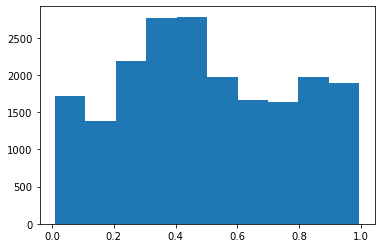

In [37]:
plt.hist(submission['pred'])
plt.show()

In [38]:
submission.describe()

,id,pred
count,20000.000000,20000.000000
mean,29999.500000,0.498630
std,5773.647028,0.275458
min,20000.000000,0.009267
25%,24999.750000,0.292050
50%,29999.500000,0.468410
75%,34999.250000,0.731152
max,39999.000000,0.994710


In [39]:
submission.to_csv('submission_best_top_20.csv', index = False)

In [24]:
CV_scores.sort_values(by = 'Numb_Folds', ascending = False).head(10)

,Run,CV_score,Numb_Folds
409,409,0.518422,3.0
236,236,0.519433,3.0
375,375,0.516672,3.0
365,365,0.516839,3.0
110,110,0.517568,3.0
199,199,0.518246,3.0
472,472,0.516574,3.0
396,396,0.515810,3.0
384,384,0.519475,3.0
356,356,0.515061,2.0
